# Import Libraries and Dataset

In [112]:
import pandas as pd
import quandl
import numpy as np
import quandl
import matplotlib.pyplot as plt
import os
import math
import talib

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

import xgboost as xgb
from sklearn.metrics import accuracy_score
import seaborn as sns
import operator
import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize=(20, 8), dpi=100)
from datetime import datetime

In [138]:
os.chdir("//Users//abhishekmukherjee//Desktop//ProjectData//FinalData")
data = pd.read_excel("MorganStanley_Final.xlsx")
print('Total dataset has {} days, and {} features.'.format(data.shape[0], \
                                                              data.shape[1]))
df = data.copy()
del df['Date']
#df_clf = data.copy()
'''
del df['Earning_Surprise_0.05']
del df['Earning_Surprise_0.1']
del df['Earning_Surprise_0.15']
'''

Total dataset has 4989 days, and 238 features.


"\ndel df['Earning_Surprise_0.05']\ndel df['Earning_Surprise_0.1']\ndel df['Earning_Surprise_0.15']\n"

In [139]:
df_clf = data.copy()
del df_clf['Date']

In [140]:
class Plot:
    
    def __init__(self, data):
        self.data = data
        
    def autocorr(self, col):
        
        plot_acf(data[col], title = col + ' Autocorrelation Plot')
        plt.show()
            
    def featureImportance(self, feature_importance, num_features, flag):
    
        f = dict()
        n = len(feature_importance)
        for i in range (n):
            f[X_test.columns[i]] = feature_importance[i]
        f = sorted(f.items(), key=operator.itemgetter(1), reverse=True)
        f = f[:num_features]
        feature_name = list()
        feature_values = list()
        for i, j in f:
            feature_name.append(i)
            feature_values.append(j)
        fig = plt.figure(figsize=(14,5))
        plt.xticks(rotation='vertical')
        plt.bar([i for i in range(len(f))], feature_values, tick_label=feature_name)
        if flag == 1:
            plt.title('Feature importance for EPS Prediction (Excluding Analyst estimate features)')
        else:
            plt.title('Feature importance for EPS Prediction (Including Analyst estimate features)')
        plt.show()
    
    def lossStatsAndCurve(self, X_test, Y_test, regressor):
        
        
        rmse = np.sqrt(mean_squared_error(Y_test, regressor.predict(X_test)))

        print("Root Mean Squared Error: %f" % (rmse))
        #print ("Regression Prediction Score: " + str(round(regressor.score(X_test,Y_test) * 100, 2)) + "%")
        eval_result = regressor.evals_result()
        training_rounds = range(len(eval_result['validation_0']['rmse']))
        plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
        plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
        plt.xlabel('Iterations')
        plt.ylabel('RMSE')
        plt.title('Training Vs Validation Error')
        plt.legend()
        plt.show()

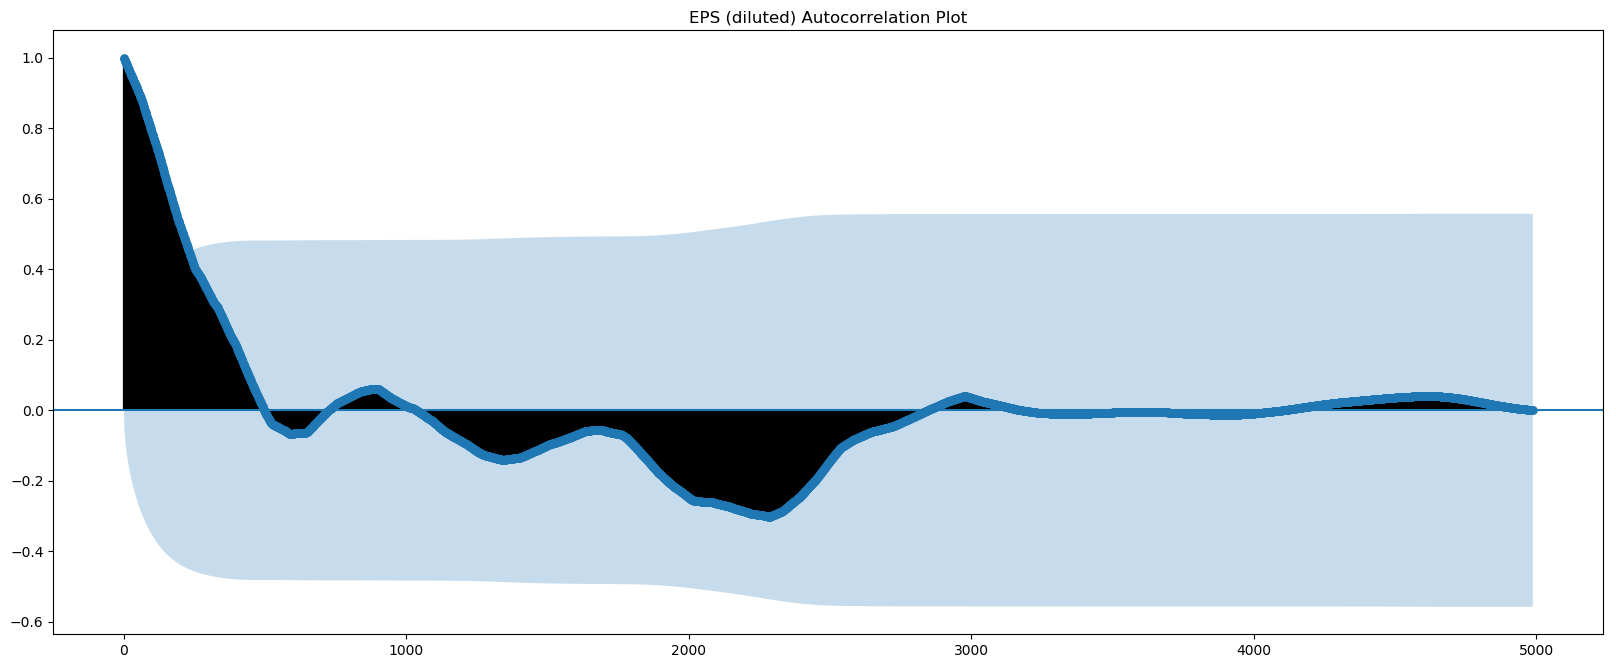

In [141]:
plot = Plot(data)
plot.autocorr('EPS (diluted)')

## Using XGBoost Method for EPS prediction (Regression Problem) and Feature Importance

In [142]:
class Model:
    def __init__(self, X_train, Y_train, X_test, Y_test):
        
        self.X_train = X_train
        self.Y_train = Y_train
        self.X_test = X_test
        self.Y_test = Y_test
    
    def trainModel(self, epoch = 1000, verbose_flag = False, learning_rate = 0.01):
        
        regressor = xgb.XGBRegressor(colsample_bytree = 0.4, learning_rate = learning_rate, base_score=0.65, max_depth = 4, alpha = 10, n_estimators = epoch)
        xgbModel=regressor.fit(X_train, Y_train,eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose = verbose_flag)
        return (xgbModel, regressor)


In [143]:
def getData(data_temp, inc_analyst):
    
    data = data_temp.copy()
    Y = (data['EPS (diluted)'])
    
    del data['EPS (recurring)']
    del data['EPS (diluted)']
    
    if inc_analyst == False:
        #del data['Growth (YoY%)_Analyst']
        del data['EPS_Analyst']
    X = data
    
    train_samples = int(X.shape[0] * 0.8)
    train_start = int(X.shape[0]*0) 
    X_train = X.iloc[train_start:train_samples]
    X_test = X.iloc[train_samples:]

    Y_train = Y.iloc[train_start:train_samples]
    Y_test = Y.iloc[train_samples:]
    
    
    return (X_train, Y_train), (X_test, Y_test)

## Including Analyst Data

[21:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:2.86115	validation_1-rmse:2.67611
[1]	validation_0-rmse:2.57802	validation_1-rmse:2.50934
[2]	validation_0-rmse:2.32703	validation_1-rmse:2.41237
[3]	validation_0-rmse:2.09713	validation_1-rmse:2.33237
[4]	validation_0-rmse:1.88994	validation_1-rmse:2.21258
[5]	validation_0-rmse:1.70361	validation_1-rmse:2.08767
[6]	validation_0-rmse:1.53547	validation_1-rmse:1.98587
[7]	validation_0-rmse:1.38403	validation_1-rmse:1.91033
[8]	validation_0-rmse:1.24827	validation_1-rmse:1.79774
[9]	validation_0-rmse:1.12526	validation_1-rmse:1.72195
[10]	validation_0-rmse:1.01451	validation_1-rmse:1.6182
[11]	validation_0-rmse:0.914904	validation_1-rmse:1.44151
[12]	validation_0-rmse:0.824811	validation_1-rmse:1.39375
[13]	validation_0-rmse:0.743692	validation_1-rmse:1.30278
[14]	validation_0-rmse:0.670538	validation_1-rmse:1.26258
[15]	validation_0-rmse:0.604613	vali

[138]	validation_0-rmse:0.00511	validation_1-rmse:0.762637
[139]	validation_0-rmse:0.005044	validation_1-rmse:0.762618
[140]	validation_0-rmse:0.004977	validation_1-rmse:0.762604
[141]	validation_0-rmse:0.004953	validation_1-rmse:0.7626
[142]	validation_0-rmse:0.004928	validation_1-rmse:0.762624
[143]	validation_0-rmse:0.004898	validation_1-rmse:0.762587
[144]	validation_0-rmse:0.004859	validation_1-rmse:0.762991
[145]	validation_0-rmse:0.004824	validation_1-rmse:0.763335
[146]	validation_0-rmse:0.004752	validation_1-rmse:0.763339
[147]	validation_0-rmse:0.004693	validation_1-rmse:0.763388
[148]	validation_0-rmse:0.004645	validation_1-rmse:0.763379
[149]	validation_0-rmse:0.004592	validation_1-rmse:0.763415
[150]	validation_0-rmse:0.004565	validation_1-rmse:0.763418
[151]	validation_0-rmse:0.00454	validation_1-rmse:0.763685
[152]	validation_0-rmse:0.004532	validation_1-rmse:0.763687
[153]	validation_0-rmse:0.004514	validation_1-rmse:0.763702
[154]	validation_0-rmse:0.004488	validation_

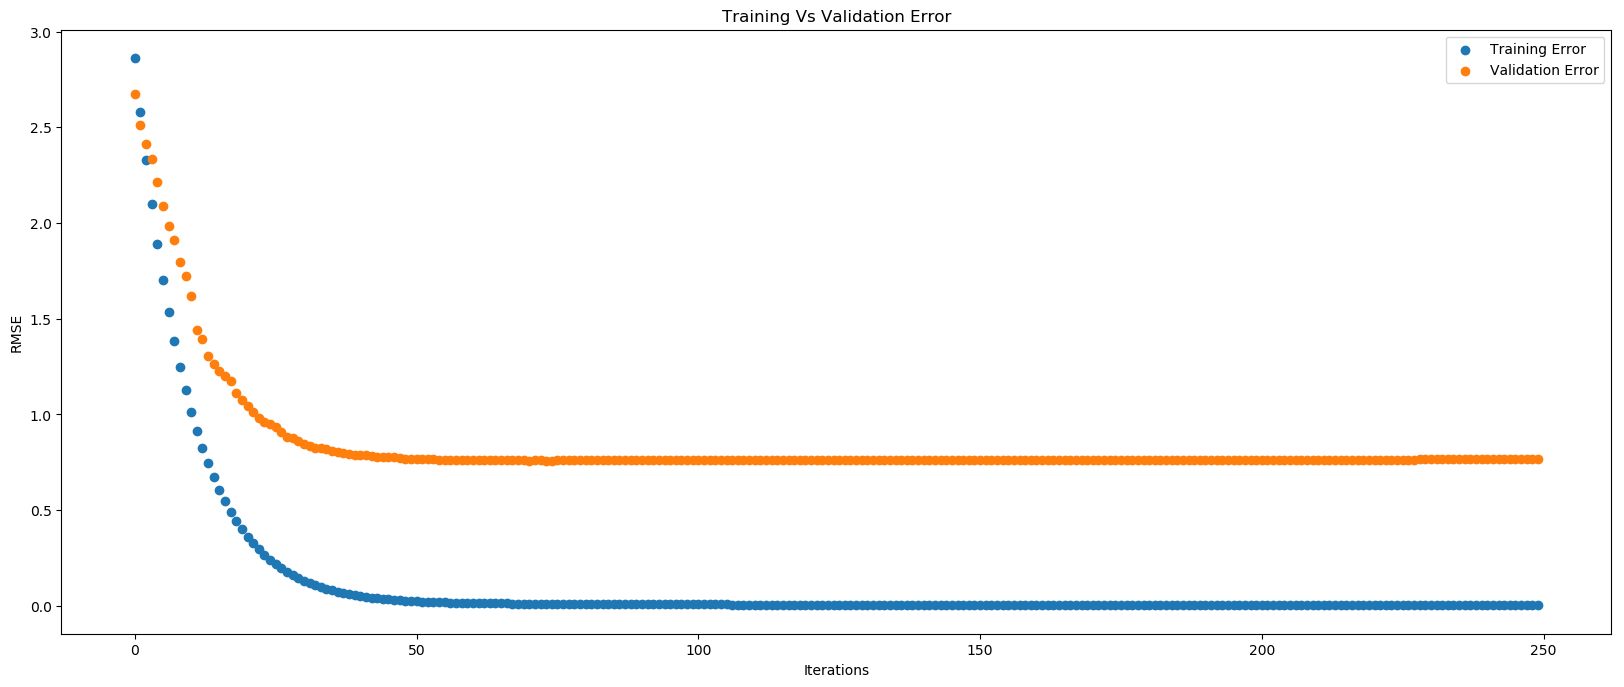

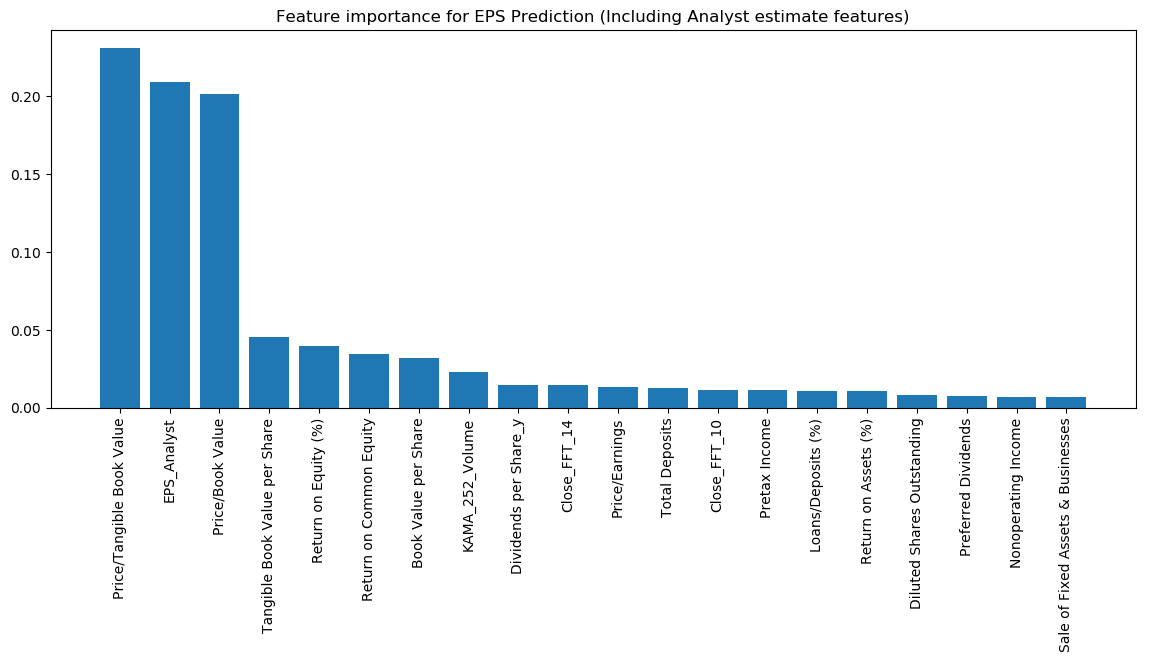

In [144]:

(X_train, Y_train), (X_test, Y_test) = getData(df, inc_analyst = True)

m1 = Model(X_train, Y_train ,X_test, Y_test)
xgbModel1, regressor1 = m1.trainModel(verbose_flag = True, learning_rate=0.1, epoch = 250)

plot.lossStatsAndCurve(X_test, Y_test, regressor1)
feature_importance = xgbModel1.feature_importances_.tolist()
plot.featureImportance(feature_importance, 20, 0)

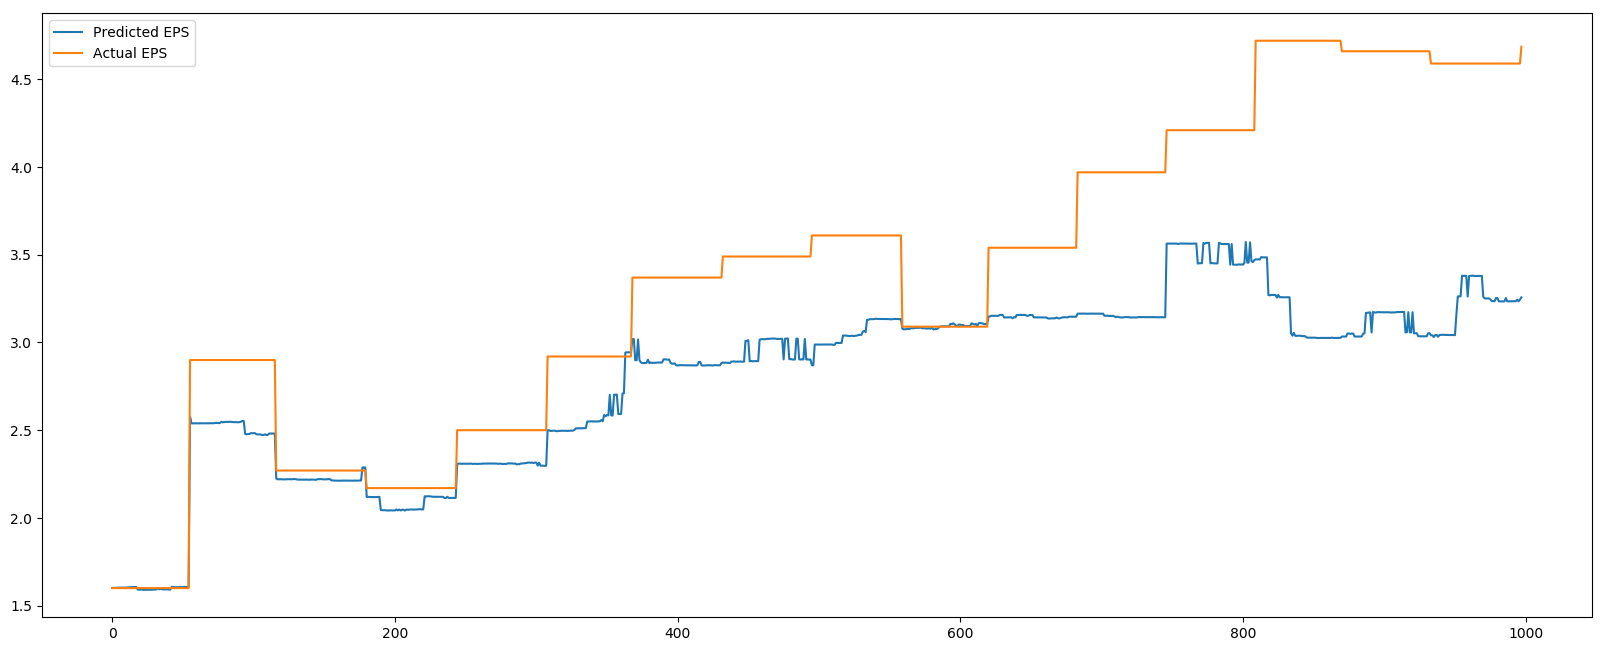

In [145]:
y_pred = regressor1.predict(X_test)
plt.plot(range(len(y_pred)), y_pred, label = "Predicted EPS")  
plt.plot(range(len(Y_test)), Y_test, label = "Actual EPS") 
plt.legend()
plt.show()

## Excluding Analyst Data

[18:51:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5.79873	validation_1-rmse:10.7798
[1]	validation_0-rmse:5.22263	validation_1-rmse:9.84916
[2]	validation_0-rmse:4.70408	validation_1-rmse:9.02764
[3]	validation_0-rmse:4.23697	validation_1-rmse:8.17147
[4]	validation_0-rmse:3.81655	validation_1-rmse:7.41575
[5]	validation_0-rmse:3.43769	validation_1-rmse:6.72025
[6]	validation_0-rmse:3.09653	validation_1-rmse:6.18575
[7]	validation_0-rmse:2.78927	validation_1-rmse:5.62143
[8]	validation_0-rmse:2.51272	validation_1-rmse:5.1986
[9]	validation_0-rmse:2.26347	validation_1-rmse:4.80649
[10]	validation_0-rmse:2.03914	validation_1-rmse:4.46367
[11]	validation_0-rmse:1.83704	validation_1-rmse:4.10345
[12]	validation_0-rmse:1.65504	validation_1-rmse:3.8262
[13]	validation_0-rmse:1.49101	validation_1-rmse:3.53606
[14]	validation_0-rmse:1.34334	validation_1-rmse:3.26902
[15]	validation_0-rmse:1.21034	validation

[140]	validation_0-rmse:0.001001	validation_1-rmse:1.08132
[141]	validation_0-rmse:0.00099	validation_1-rmse:1.08132
[142]	validation_0-rmse:0.000971	validation_1-rmse:1.08131
[143]	validation_0-rmse:0.000967	validation_1-rmse:1.08131
[144]	validation_0-rmse:0.000962	validation_1-rmse:1.08131
[145]	validation_0-rmse:0.000951	validation_1-rmse:1.08131
[146]	validation_0-rmse:0.000936	validation_1-rmse:1.08132
[147]	validation_0-rmse:0.000932	validation_1-rmse:1.08132
[148]	validation_0-rmse:0.000927	validation_1-rmse:1.08132
[149]	validation_0-rmse:0.000917	validation_1-rmse:1.08132
Root Mean Squared Error: 1.081316


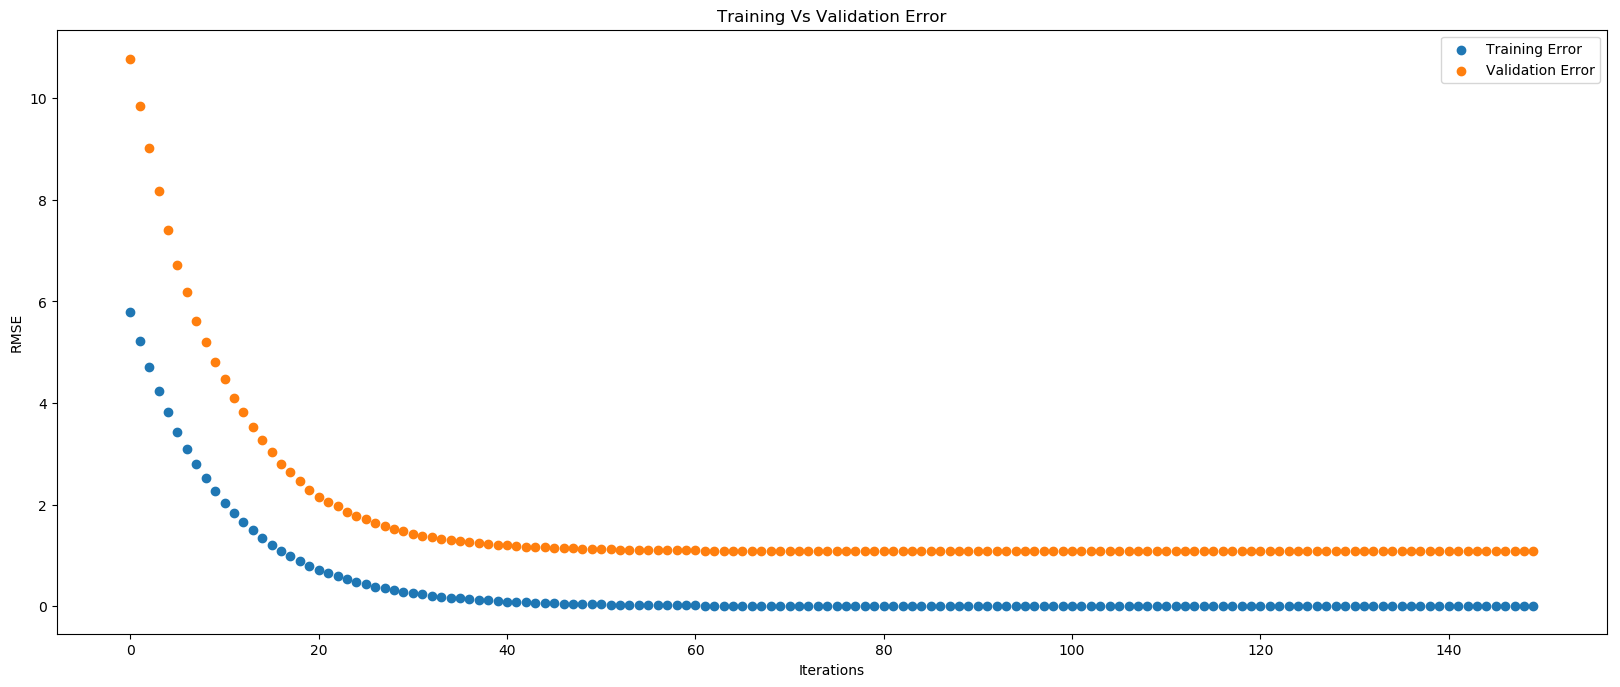

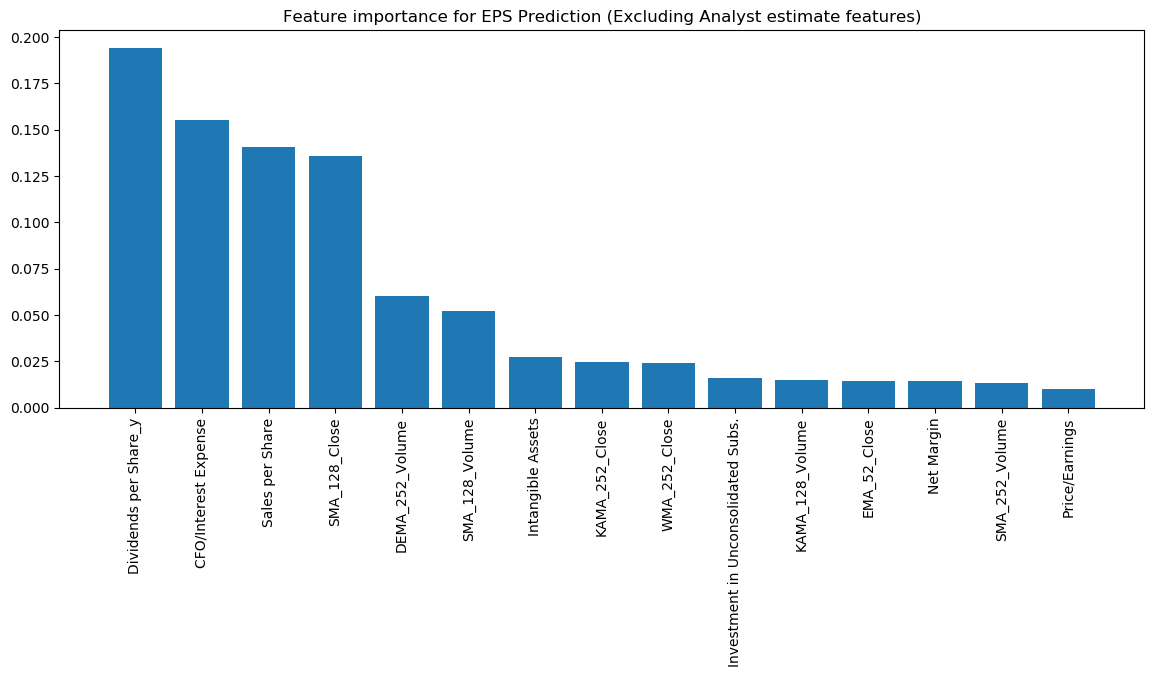

In [105]:
(X_train, Y_train), (X_test, Y_test) = getData(df, inc_analyst=False)
m2 = Model(X_train, Y_train, X_test, Y_test)
xgbModel2, regressor2 = m2.trainModel(verbose_flag=True, epoch = 150, learning_rate=0.1)
plot.lossStatsAndCurve(X_test, Y_test, regressor2)


feature_importance = xgbModel2.feature_importances_.tolist()
plot.featureImportance(feature_importance, 15, 1)

***Note: Keeping EPS_Analyst feature improves our Model's predictive accuracy in both the Scenario which matches with out intuition***

# Feature Reduction using XGBoost's feature importance

In [80]:
def featureReduction(feature_importance):
    
    f = dict()
    n = len(feature_importance)
    for i in range (n):
        f[X_test.columns[i]] = feature_importance[i]
    f = sorted(f.items(), key=operator.itemgetter(1), reverse=True)
    feature_name = list()
    feature_values = list()
    for i, j in f:
        feature_name.append(i)
        feature_values.append(j)
    
    return feature_name, feature_values
    

In [81]:
(X_train, Y_train), (X_test, Y_test) = getData(df, inc_analyst=True)
feature_importance = xgbModel1.feature_importances_.tolist()
feature_sorted, _ = featureReduction(feature_importance)
df_temp = df.copy()

n_features_to_keep = 50
for f in feature_sorted[n_features_to_keep:-1]:
    for col in df_temp.columns:
        if col == f:
            del df_temp[col]
            
df_temp.shape[1]

53

[18:33:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:8.92526	validation_1-rmse:22.6859
[1]	validation_0-rmse:8.03758	validation_1-rmse:21.3015
[2]	validation_0-rmse:7.23823	validation_1-rmse:19.8304
[3]	validation_0-rmse:6.51838	validation_1-rmse:18.5314
[4]	validation_0-rmse:5.87005	validation_1-rmse:17.3527
[5]	validation_0-rmse:5.28624	validation_1-rmse:16.2996
[6]	validation_0-rmse:4.76103	validation_1-rmse:15.3827
[7]	validation_0-rmse:4.28767	validation_1-rmse:14.5606
[8]	validation_0-rmse:3.86145	validation_1-rmse:13.8105
[9]	validation_0-rmse:3.47764	validation_1-rmse:13.1421
[10]	validation_0-rmse:3.13209	validation_1-rmse:12.5624
[11]	validation_0-rmse:2.82094	validation_1-rmse:12.0463
[12]	validation_0-rmse:2.54072	validation_1-rmse:11.5734
[13]	validation_0-rmse:2.28836	validation_1-rmse:11.1528
[14]	validation_0-rmse:2.06117	validation_1-rmse:10.7879
[15]	validation_0-rmse:1.85654	validati

[140]	validation_0-rmse:0.003932	validation_1-rmse:7.75195
[141]	validation_0-rmse:0.003894	validation_1-rmse:7.75195
[142]	validation_0-rmse:0.003845	validation_1-rmse:7.75199
[143]	validation_0-rmse:0.003803	validation_1-rmse:7.75199
[144]	validation_0-rmse:0.003792	validation_1-rmse:7.75185
[145]	validation_0-rmse:0.003689	validation_1-rmse:7.75186
[146]	validation_0-rmse:0.003673	validation_1-rmse:7.75173
[147]	validation_0-rmse:0.003641	validation_1-rmse:7.75173
[148]	validation_0-rmse:0.003635	validation_1-rmse:7.75184
[149]	validation_0-rmse:0.003597	validation_1-rmse:7.75183
[150]	validation_0-rmse:0.003568	validation_1-rmse:7.75189
[151]	validation_0-rmse:0.003474	validation_1-rmse:7.7519
[152]	validation_0-rmse:0.003448	validation_1-rmse:7.75199
[153]	validation_0-rmse:0.003411	validation_1-rmse:7.75202
[154]	validation_0-rmse:0.003393	validation_1-rmse:7.75203
[155]	validation_0-rmse:0.003388	validation_1-rmse:7.75181
[156]	validation_0-rmse:0.003373	validation_1-rmse:7.7521

[280]	validation_0-rmse:0.001322	validation_1-rmse:7.75364
[281]	validation_0-rmse:0.001319	validation_1-rmse:7.75372
[282]	validation_0-rmse:0.001314	validation_1-rmse:7.75373
[283]	validation_0-rmse:0.001304	validation_1-rmse:7.75373
[284]	validation_0-rmse:0.0013	validation_1-rmse:7.75375
[285]	validation_0-rmse:0.001293	validation_1-rmse:7.75375
[286]	validation_0-rmse:0.001288	validation_1-rmse:7.75375
[287]	validation_0-rmse:0.00128	validation_1-rmse:7.75375
[288]	validation_0-rmse:0.001269	validation_1-rmse:7.75375
[289]	validation_0-rmse:0.001264	validation_1-rmse:7.75375
[290]	validation_0-rmse:0.001261	validation_1-rmse:7.75373
[291]	validation_0-rmse:0.001254	validation_1-rmse:7.75374
[292]	validation_0-rmse:0.001251	validation_1-rmse:7.75374
[293]	validation_0-rmse:0.001242	validation_1-rmse:7.75374
[294]	validation_0-rmse:0.00124	validation_1-rmse:7.75373
[295]	validation_0-rmse:0.001239	validation_1-rmse:7.7537
[296]	validation_0-rmse:0.001235	validation_1-rmse:7.7537
[29

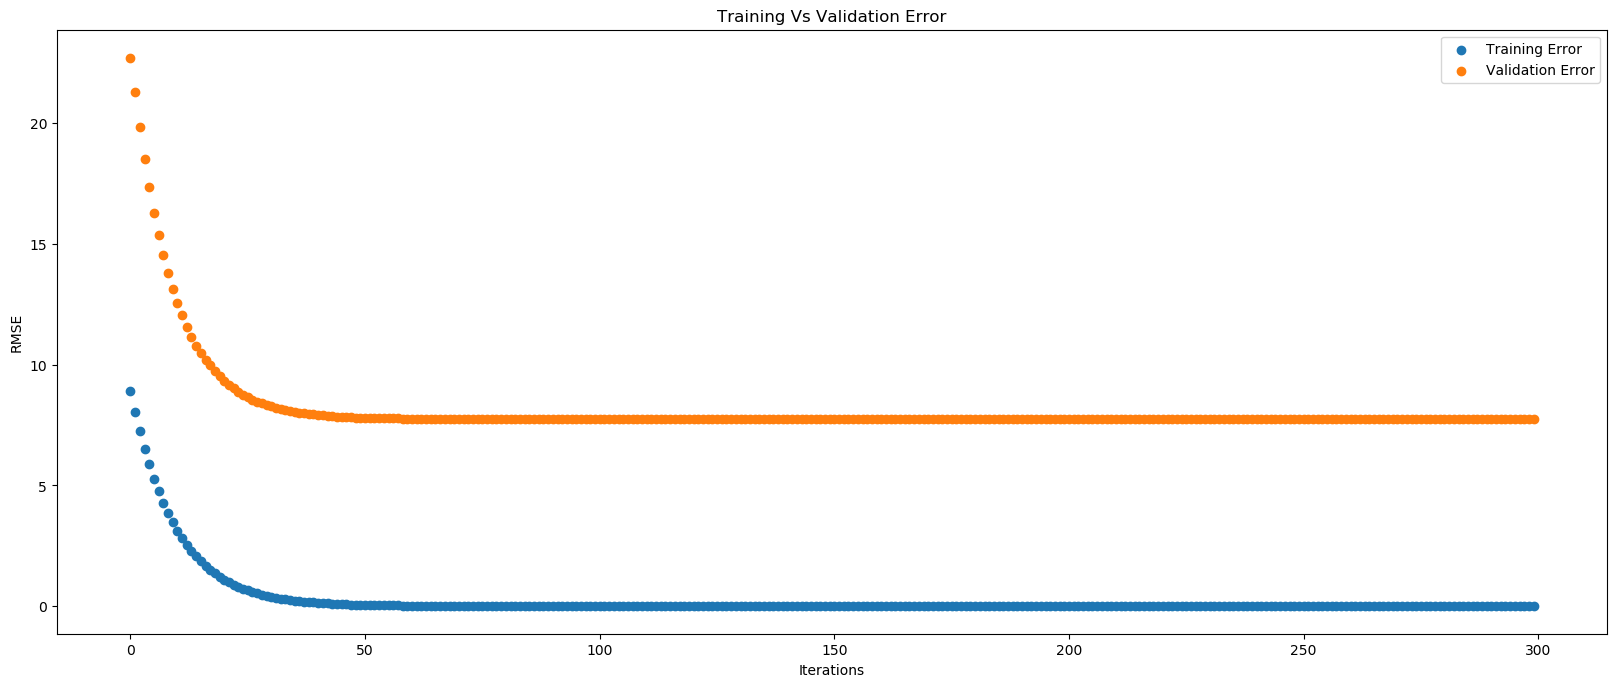

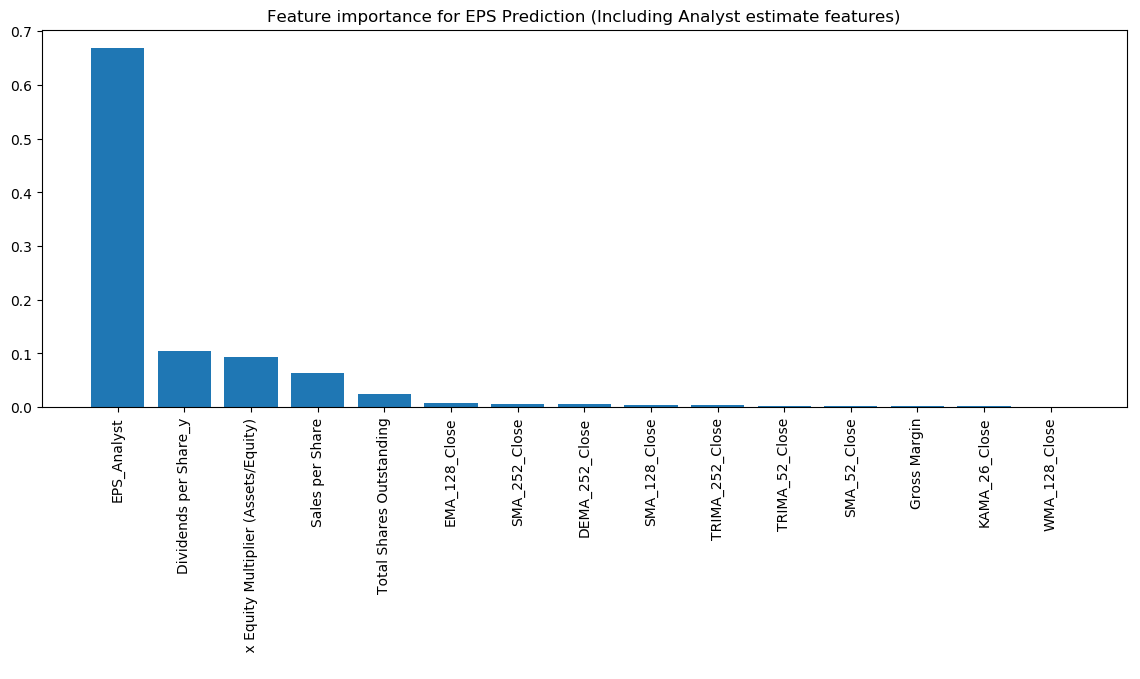

In [82]:
(X_train, Y_train), (X_test, Y_test) = getData(df_temp, inc_analyst=True)
m3 = Model(X_train, Y_train, X_test, Y_test)
xgbModel3, regressor3 = m3.trainModel(verbose_flag = True, learning_rate=0.1, epoch = 300)
plot.lossStatsAndCurve(X_test, Y_test, regressor3)


feature_importance = xgbModel3.feature_importances_.tolist()
plot.featureImportance(feature_importance, 15, 0)

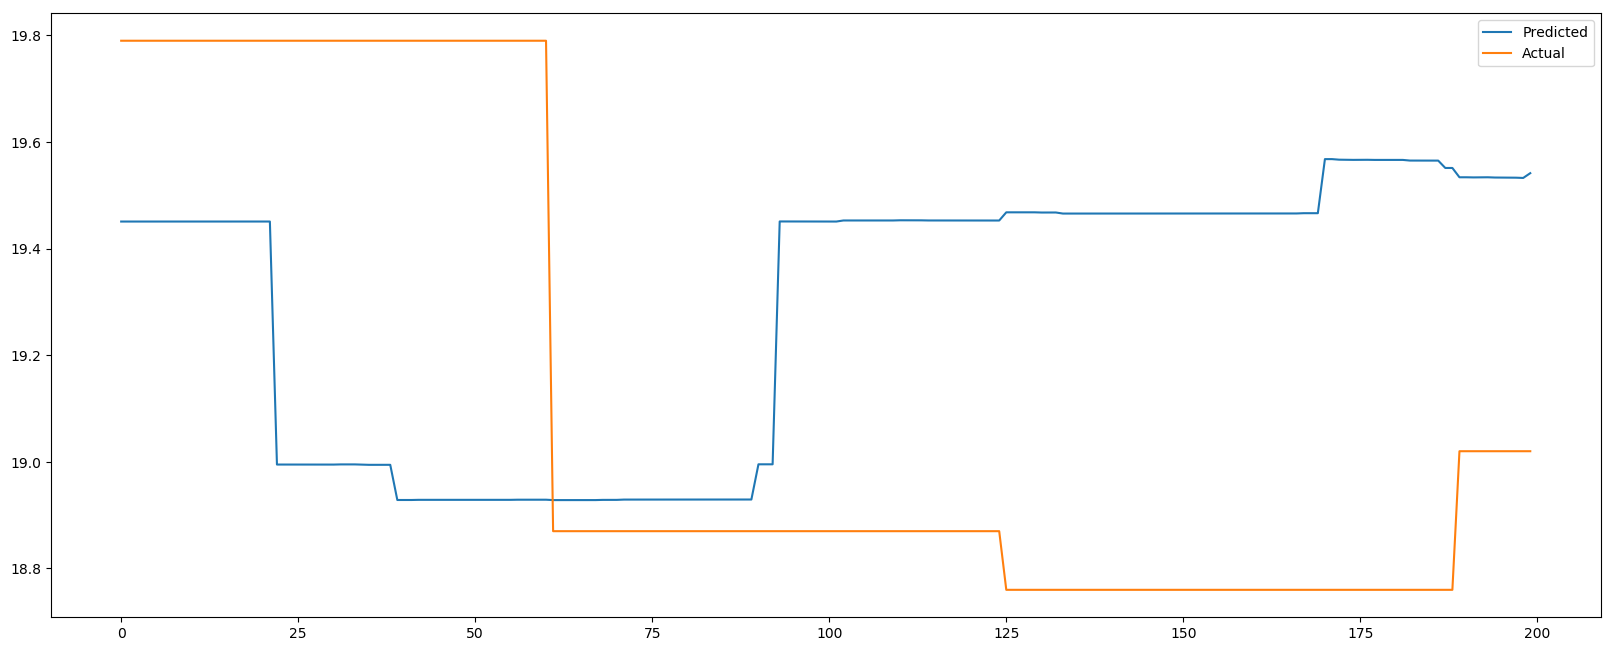

In [74]:
y_pred = regressor3.predict(X_test)
#print (y_pred[1])

#for i, j in zip(y_pred, Y_test):
#    print (i, j)
plt.plot(range(len(y_pred)), y_pred, label = "Predicted")  
plt.plot(range(len(Y_test)), Y_test, label = "Actual") 
plt.legend()
plt.show()
#for i in range(len(Y_test)):
#    print (Y_test[i])

#print (Y_test[0])
#print (Y_test[60])

***Note: Keeping 43 most predictive features reduces the Model's Root Mean Squared Error from 0.650777 to 0.647092 (Try playing with n_features_to_keep to improve the Model's predictive accuracy). Hence we can conclude that it is optimal to keep 43 most predictive features obtained from XGBoost's feature Importance***

# Using XGBoost for Earning Surprise Classification


In [227]:
def getDataClassification(data_temp):
    
    data = data_temp.copy()
    Y = data['Earning_Surprise_0.15']

    del data['Earning_Surprise_0.05']
    del data['Earning_Surprise_0.1']
    del data['Earning_Surprise_0.15']
    del data['EPS (diluted)']
    del data['EPS (recurring)']
    
    #del data['EPS_Analyst']
    #del data['Growth (YoY%)_Analyst']
    
    X = data
    train_samples = int(X.shape[0] * 0.5)
    
    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    Y_train = Y.iloc[:train_samples]
    Y_test = Y.iloc[train_samples:]
    
    return X_train, Y_train, X_test, Y_test

In [228]:
X_train, Y_train, X_test, Y_test = getDataClassification(df_clf)
model = xgb.XGBClassifier()
model.fit(X_train, Y_train, verbose = True)
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.87%


In [229]:
print(classification_report(Y_test, predictions))
accuracy = accuracy_score(Y_test, predictions)
print ("Classifier Accuracy: ", accuracy)
cm = confusion_matrix(Y_test, predictions)
print ()
print ("Confusion Matrix:")
print (cm)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98      2391
          1       1.00      0.02      0.05        42
          2       0.00      0.00      0.00        62

avg / total       0.94      0.96      0.94      2495

Classifier Accuracy:  0.9587174348697395

Confusion Matrix:
[[2391    0    0]
 [  41    1    0]
 [  62    0    0]]


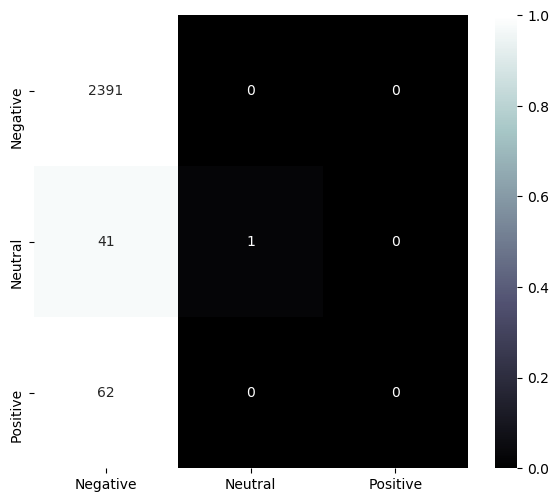

In [230]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')

plot_confusion_matrix(cm, ['Negative', 'Neutral', 'Positive'])